In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Add r before the path for reading a file converts the normal string into raw string.

What is meant by raw string in Python?
Python raw string treats the backslash character (\) as a literal character. Raw string is useful when a string needs to contain a backslash, such as for a regular expression or Windows directory path, and you don't want it to be treated as an escape character.


In [3]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Zomato Project\drive-download-20230130T142916Z-001/zomato.csv')
df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape()


TypeError: 'tuple' object is not callable

In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
len(df)

51717

In [10]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [14]:
for x in feature_na:
    print('{} has {} %age of null values'.format(x,np.round(df[x].isnull().sum()/len(df)*100,4)))

rate has 15.0337 %age of null values
phone has 2.3358 %age of null values
location has 0.0406 %age of null values
rest_type has 0.4389 %age of null values
dish_liked has 54.2916 %age of null values
cuisines has 0.087 %age of null values
approx_cost(for two people) has 0.669 %age of null values


In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [17]:
df.shape

(43942, 17)

In [18]:
a=4/5

In [19]:
a.split('/')

AttributeError: 'float' object has no attribute 'split'

In [20]:
def split(x):
    return x.split('/')[0]

In [23]:
df['rate']=df['rate'].apply(split)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [24]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
df.replace('NEW',0,inplace=True)

In [27]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [28]:
df.replace('-',0,inplace=True)
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [29]:
df['rate'].dtype

dtype('O')

dtype('O'), it is the letter 'o' of the alphabet, not zero which stands for object data type

In [31]:
df['rate'].astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: float64

We need to pass df['rate'].astype(float) to df['rate'], otherwise it will not reflect in the main df.

In [32]:
df['phone'].unique()

array(['080 42297555\r\n+91 9743772233', '080 41714161', '+91 9663487993',
       ..., '+91 9663517066\n+91 9686861135', '+91 9164562939',
       '080 65951222'], dtype=object)

In [33]:
len(df['phone'])

43942

In [34]:
df['phone'].isnull().sum()

832

A. Calculate average rating of each resturant.

In [35]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [38]:
resturants=df['name'].unique()
resturants


array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [39]:
df['rate'].sum()

TypeError: can only concatenate str (not "int") to str

In [ ]:
for x in resturants:
    avg_rate=df['rate'].sum()/

select avg(rate), name
from df 
group by name          //SQL Code

In [68]:
xyz=df.groupby('name')['rate'].mean()
xyz.index

Index(['#FeelTheROLL', '#L-81 Cafe', '#refuel', '1000 B.C',
       '100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C', '11 to 11 Express Biriyanis',
       '1131 Bar + Kitchen', '12th Main - Grand Mercure', '1441 Pizzeria',
       '1522 - The Pub',
       ...
       'Zyksha', 'alt',
       'b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© - Shangri-La Hotel',
       'de Ranthal', 'eat.fit', 'i-Bar - The Park Bangalore',
       'iFruit Live Ice Creams', 'iSpice Resto Cafe', 'nu.tree',
       're:cess - Hilton Bangalore Embassy GolfLinks'],
      dtype='object', name='name', length=7162)

SyntaxError: invalid syntax (1820341823.py, line 1)

In [44]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [53]:
df['rate'].dtype

dtype('float64')

In [51]:
df['rate']=df['rate'].astype(float)

In [52]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: float64

In [61]:
df_rate=df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['Resturant','Average Rating']
df_rate

Resturant  Average Rating
0                                     #FeelTheROLL        3.400000
1                                       #L-81 Cafe        3.900000
2                                          #refuel        3.700000
3                                         1000 B.C        3.200000
4             100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C        3.700000
...                                            ...             ...
7157                    i-Bar - The Park Bangalore        3.800000
7158                        iFruit Live Ice Creams        3.400000
7159                             iSpice Resto Cafe        3.700000
7160                                       nu.tree        4.314286
7161  re:cess - Hilton Bangalore Embassy GolfLinks        4.100000

[7162 rows x 2 columns]

B. Get distribution of rating column and try to find out what distribution this feature support?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Rating', ylabel='Density'>

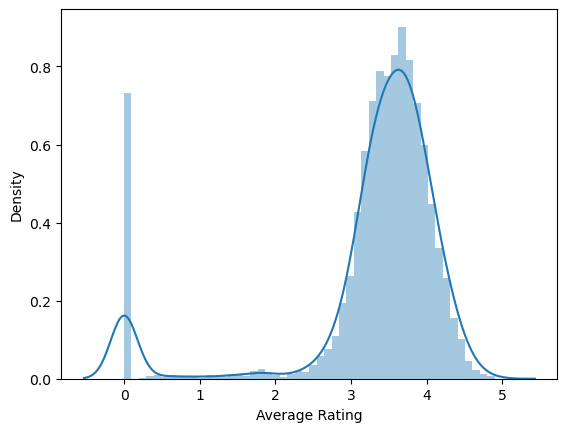

In [62]:
sns.distplot(df_rate['Average Rating'])

C. Top Resturant chains in Bangalore?

In [64]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

Text(0.5, 1.0, 'Most famous resturants in Bangalore')

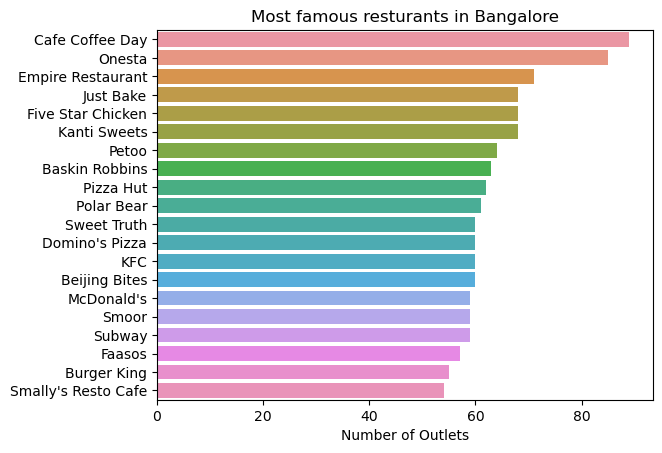

In [70]:
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.xlabel('Number of Outlets')
plt.title('Most famous resturants in Bangalore')

In [82]:
x=df['online_order'].value_counts()
x


Yes    28308
No     15634
Name: online_order, dtype: int64

In [83]:
labels=['Accepted','Not Accepted']

In [81]:
import plotly.express as px

In [87]:
px.pie(df,values=x,labels=labels,title='Pie Chart')

Ratio Between Resturants who provide table and do not provide table.

In [88]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [95]:
y=df['book_table'].value_counts()

In [111]:
lables=["No Booking","Booking"]
lables

['No Booking', 'Booking']

In [99]:
px.pie(df,values=y,labels=labels)

For more interactive plot, we make use of iplot

In [101]:
import plotly.graph_objs as go

In [102]:
from plotly.offline import iplot

In [115]:
trace=go.Pie(labels=lables,values=y,hoverinfo='label+percent',textinfo='value')
iplot([trace])


In depth analysis of types of resturants we have..

In [118]:
df['rest_type'].value_counts()

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

isna() and isnull() are alias functions, both return same things.

In [131]:
df['rest_type'].isnull().sum()

151

In [132]:
df['rest_type'].dropna(inplace=True)

In [133]:
df['rest_type'].isnull().sum()

151

In [134]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

df['rest_type'].dropna(inplace=True)    //Became Outdated!

In [153]:
df.dropna(subset=['rest_type'],how='any',inplace=True)  

In [154]:
df['rest_type'].isnull().sum()

0

In [155]:
len(df['rest_type'].unique())

87

DataFrame.nlargest(n, columns, keep='first')
Return the first n rows ordered by columns in descending order.


In [174]:
trace1=go.Bar(

    x=df['rest_type'].value_counts().nlargest(20).index,
    y=df['rest_type'].value_counts().nlargest(20)
)

iplot([trace1])

In [172]:
df['rest_type'].value_counts().nlargest(20)

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

In [170]:
df['rest_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 43791, dtype: object>

Highest Voted Resturants

<AxesSubplot:xlabel='name'>

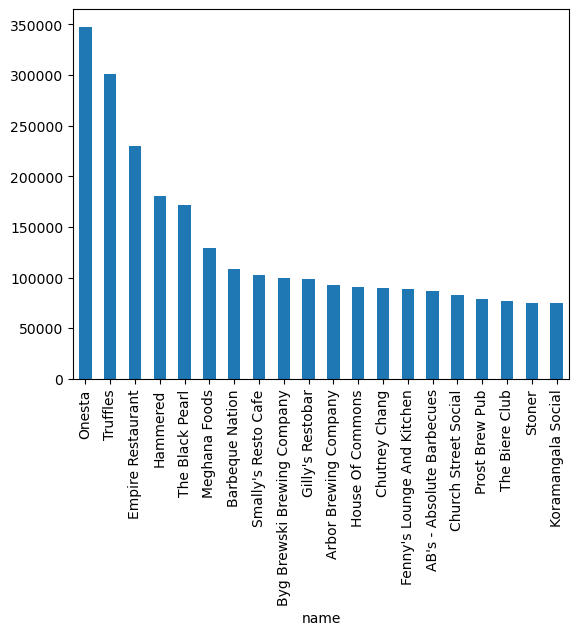

In [178]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

Total Number of Variety of Resturants in Bangalore

In [179]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [184]:
cuisines=df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2284
North Indian, Chinese                  2036
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 632
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [187]:
trace3=go.Bar(
x=df['cuisines'].value_counts()[0:10].index,
    y=df['cuisines'].value_counts()[0:10]

)
iplot([trace3])

Analyse Approx cost of two people feature.

In [193]:
df['approx_cost(for two people)'].isnull().sum()

250

In [194]:
df.dropna(subset='approx_cost(for two people)',inplace=True, how='any')

In [195]:
df['approx_cost(for two people)'].isnull().sum()

0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



ValueError: could not convert string to float: '1,200'

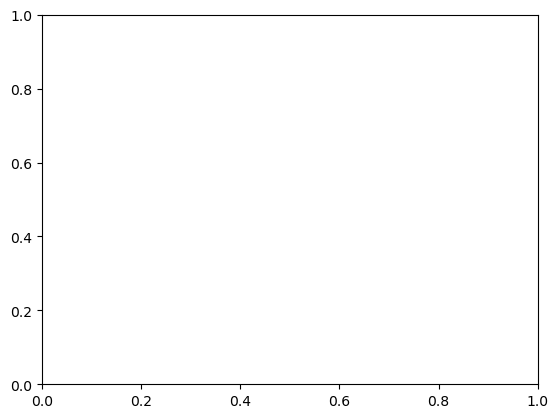

In [196]:
sns.distplot(df['approx_cost(for two people)'])

In [202]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [203]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [207]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [208]:
df['approx_cost(for two people)'].dtype

dtype('int32')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

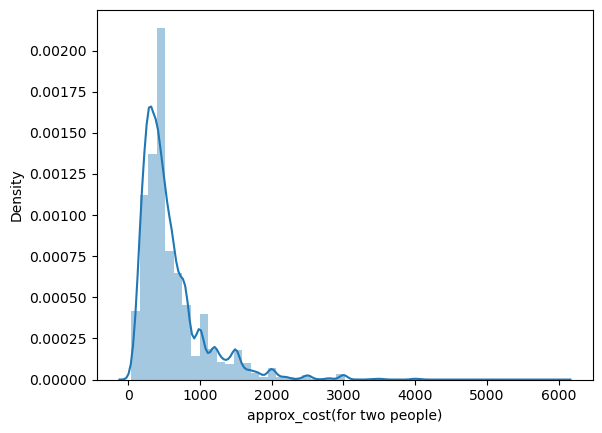

In [211]:
sns.distplot(df['approx_cost(for two people)'])

Analyse Approx cost of two people Vs Rating. Find out some relationship.

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

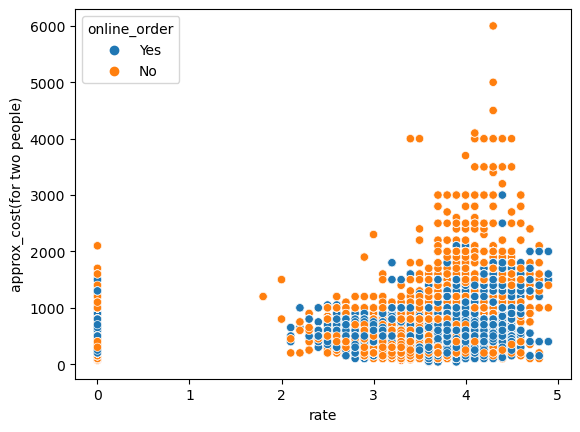

In [214]:
sns.scatterplot(x='rate',y='approx_cost(for two people)', hue='online_order',data=df)

Is there any difference between the votes resturants accepting and not accepting online orders?

In [216]:
df.groupby('online_order')['votes'].mean()

online_order
No     340.858848
Yes    330.632896
Name: votes, dtype: float64

In [217]:
px.pie(values=df.groupby('online_order')['votes'].mean())

In [218]:
px.box(df,x='online_order',y='votes')

Is there any difference between the price of  resturants accepting and not accepting online orders?

In [221]:
px.box(df,x='online_order',y='approx_cost(for two people)')

In [220]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

Find out most luxurious resturants of Bangalore?

In [222]:
df['approx_cost(for two people)'].min()

40

In [223]:
df['approx_cost(for two people)'].max()

6000

In [225]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [ ]:
Top 10 most expensive resturant with approx cost for two people?

In [229]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [230]:
data=df.copy()

In [231]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [233]:
data.set_index('name',inplace=True)

In [234]:
data.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

<AxesSubplot:xlabel='name'>

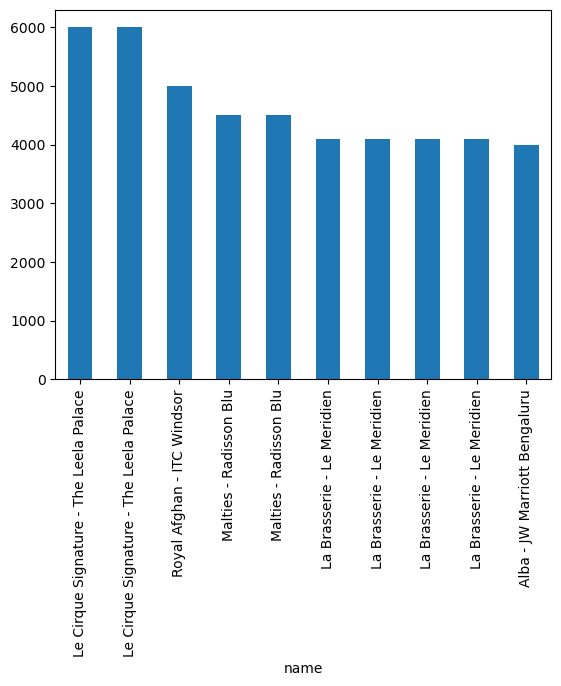

In [236]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

<AxesSubplot:xlabel='name'>

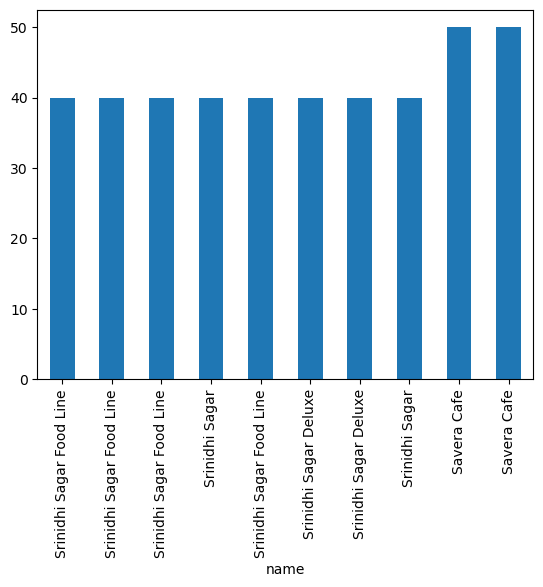

In [237]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

Find all the resturants that are below 500(budget hotel) as well as affordable?

In [244]:
df_budget=data[data['approx_cost(for two people)']<500].loc[:,'approx_cost(for two people)']
df_budget=df_budget.reset_index()
df_budget.head()


name  approx_cost(for two people)
0          Addhuri Udupi Bhojana                          300
1                     Caf-Eleven                          450
2                       T3H Cafe                          300
3  360 Atoms Restaurant And Cafe                          400
4               The Vintage Cafe                          400

In [ ]:
Resturants with rating >4 and budget friendly too.

In [262]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape


(2436, 17)

In [261]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())


372

In [264]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].to_frame()

name
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
12                                      The Coffee Shack
34                                                Faasos
51                                      Shree Cool Point
52                                Corner House Ice Cream
...                                                  ...
51312                                    Biryani Kitchen
51313                                             Stoner
51345                                       The Wok Shop
51376                                            nu.tree
51437                                        Captain Egg

[2436 rows x 1 columns]

In [271]:
df_budget=data[data['approx_cost(for two people)']<500].loc[:,'approx_cost(for two people)']
df_budget=df_budget.reset_index()
df_budget.head()


name  approx_cost(for two people)
0          Addhuri Udupi Bhojana                          300
1                     Caf-Eleven                          450
2                       T3H Cafe                          300
3  360 Atoms Restaurant And Cafe                          400
4               The Vintage Cafe                          400

In [273]:
df_new=df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
34                                             Faasos          Yes         No   
51                                   Shree Cool Point          Yes         No   
52                             Corner House Ice Cream           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [276]:
df_new.groupby('location').head()

url  \
10     https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     https://www.zomato.com/bangalore/the-coffee-sh...   
34     https://www.zomato.com/bangalore/faasos-banash...   
51     https://www.zomato.com/bangalore/shree-cool-po...   
52     https://www.zomato.com/bangalore/corner-house-...   
...                                                  ...   
46690  https://www.zomato.com/bangalore/cinnamon-rena...   
48618  https://www.zomato.com/bangalore/chikkanna-tif...   
50211  https://www.zomato.com/bangalore/cakesta-itpl-...   
50330  https://www.zomato.com/bangalore/happy-endings...   
51028  https://www.zomato.com/bangalore/happy-endings...   

                                                 address  \
10     12,29 Near PES University Back Gate, D'Souza N...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51     1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52     808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   
...                                                  ...   
46690  17,17/1, Ground Floor, Madhavanagar Extension,...   
48618  Near Ulsoor Gate Police Station, Cubbonpet, Ci...   
50211   Ascendas Park Square, ITPL Main Road, Whitefield   
50330  Third Floor, Ascendas Park Square, ITPB, White...   
51028  Third Floor, Ascendas Park Square, ITPB, White...   

                                                    name online_order  \
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes   
12                                      The Coffee Shack          Yes   
34                                                Faasos          Yes   
51                                      Shree Cool Point          Yes   
52                                Corner House Ice Cream           No   
...                                                  ...          ...   
46690            Cinnamon - Renaissance Hotel, Bengaluru           No   
48618                              Chikkanna Tiffin Room           No   
50211                                            Cakesta          Yes   
50330                                      Happy Endings          Yes   
51028                                      Happy Endings          Yes   

      book_table  rate  votes                           phone  \
10            No   4.1    402  080 26724489\r\n+91 7406048982   
12           Yes   4.2    164                  +91 9731644212   
34            No   4.2    415                  +91 7700020020   
51            No   4.1     28                  +91 9900617124   
52            No   4.3    345  080 26713965\r\n+91 9845444155   
...          ...   ...    ...                             ...   
46690         No   4.3    236                    080 46855555   
48618         No   4.5    207    +91 9845917991\n080 40905389   
50211         No   4.1    126                  +91 7815070674   
50330         No   4.1    180    +91 8123367003\n080 28026543   
51028         No   4.1    180    +91 8123367003\n080 28026543   

                         location               rest_type  \
10                   Banashankari                    Cafe   
12                   Banashankari                    Cafe   
34                   Banashankari             Quick Bites   
51                    Vijay Nagar             Quick Bites   
52                   Banashankari          Dessert Parlor   
...                           ...                     ...   
46690            Race Course Road          Dessert Parlor   
48618                 City Market             Quick Bites   
50211  ITPL Main Road, Whitefield                  Bakery   
50330  ITPL Main Road, Whitefield  Bakery, Dessert Parlor   
51028  ITPL Main Road, Whitefield  Bakery, Dessert Parlor   

                                              dish_liked  \
10     Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12     Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34     Rolls, Veggie Wrap, Chocolate Fan

In [282]:
location=[]
total=[]

for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    

In [278]:
location

['BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Brigade Road',
 'Brookefield',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'Electronic City',
 'Frazer Town',
 'HSR',
 'Hennur',
 'Hosur Road',
 'ITPL Main Road, Whitefield',
 'Indiranagar',
 'JP Nagar',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'Kalyan Nagar',
 'Kammanahalli',
 'Koramangala',
 'Koramangala 1st Block',
 'Koramangala 2nd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Koramangala 8th Block',
 'Lavelle Road',
 'MG Road',
 'Majestic',
 'Malleshwaram',
 'Marathahalli',
 'Nagawara',
 'New BEL Road',
 'Old Airport Road',
 'Race Course Road',
 'Rajajinagar',
 'Residency Road',
 'Richmond Road',
 'Sadashiv Nagar',
 'Sahakara Nagar',
 'Sanjay Nagar',
 'Sarjapur Road',
 'Seshadripuram',
 'Shivajinagar',
 'St. Marks Road',
 'Thippasandra',
 'Ulsoor',
 'Varthur 

In [279]:
location_df

url  \
39465  https://www.zomato.com/bangalore/new-agarwal-b...   
39842  https://www.zomato.com/bangalore/chandrappa-ho...   
44016  https://www.zomato.com/bangalore/new-agarwal-b...   
44234  https://www.zomato.com/bangalore/chandrappa-ho...   

                                                 address                name  \
39465  333, MSR Road, Gokul Extension, Mathikere, Yes...  New Agarwal Bhavan   
39842  40/4, 15th Main, MSR Industrial Estate Road, M...    Chandrappa Hotel   
44016  333, MSR Road, Gokul Extension, Mathikere, Yes...  New Agarwal Bhavan   
44234  40/4, 15th Main, MSR Industrial Estate Road, M...    Chandrappa Hotel   

      online_order book_table  rate  votes                         phone  \
39465          Yes         No   4.1    253                  080 23371157   
39842          Yes         No   4.2    253  +91 9731719888\n080 23606186   
44016          Yes         No   4.1    254                  080 23371157   
44234          Yes         No   4.2    253  +91 9731719888\n080 23606186   

          location                rest_type  \
39465  Yeshwantpur  Quick Bites, Sweet Shop   
39842  Yeshwantpur              Quick Bites   
44016  Yeshwantpur  Quick Bites, Sweet Shop   
44234  Yeshwantpur              Quick Bites   

                                              dish_liked  \
39465  Badam Milk, Chaat, Sandwich, Noodles, Ghee Dos...   
39842  Pork Pepper Fry, Mutton Chops, Mutton Biryani,...   
44016  Badam Milk, Chaat, Sandwich, Noodles, Ghee Dos...   
44234  Pork Pepper Fry, Mutton Chops, Mutton Biryani,...   

                                         cuisines  \
39465  North Indian, Chinese, Street Food, Mithai   
39842         South Indian, North Indian, Chinese   
44016  North Indian, Chinese, Street Food, Mithai   
44234         South Indian, North Indian, Chinese   

       approx_cost(for two people)  \
39465                          400   
39842                          450   
44016                          400   
44234                          450   

                                            reviews_list  \
39465  [('Rated 4.5', 'RATED\n  The staff is really p...   
39842  [('Rated 4.0', "RATED\n  Jus amazing!!!!Ã\x83...   
44016  [('Rated 4.5', 'RATED\n  The staff is really p...   
44234  [('Rated 4.0', "RATED\n  Jus amazing!!!!Ã\x83...   

                                               menu_item listed_in(type)  \
39465  ['Basundi [1 Cup]', 'Carrot Halwa [100 Grams]'...        Delivery   
39842                                                 []        Delivery   
44016  ['Basundi [1 Cup]', 'Carrot Halwa [100 Grams]'...        Delivery   
44234                                                 []        Delivery   

      listed_in(city)  
39465    Malleshwaram  
39842    Malleshwaram  
44016    New BEL Road  
44234    New BEL Road

In [298]:
total

AttributeError: 'list' object has no attribute 'head'

In [299]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [286]:
location_df.columns=['Locations','Resturants']
location_df.head()

Locations  Resturants
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

Finding best budget resturants in any location.

In [293]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<400)&(df['rate']>4)&(df['location']==location)&(df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [294]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop',
       'Yum In My Tum', 'Chaatimes', 'Swad Punjab Da', 'Roti Wala'],
      dtype=object)

Which are the foodie areas?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

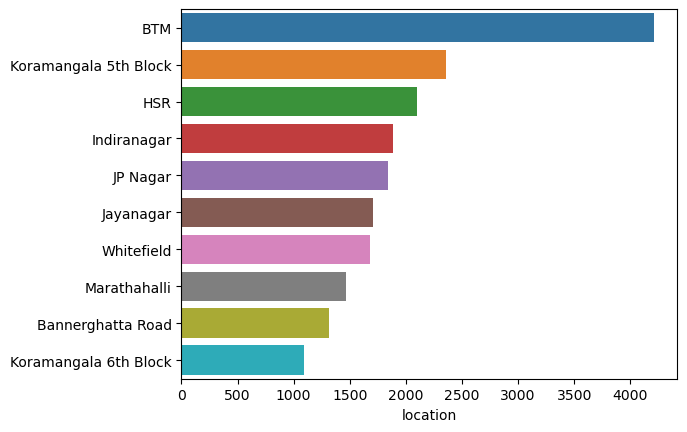

In [301]:
restaurant_location=df['location'].value_counts()[0:10]
sns.barplot(restaurant_location,restaurant_location.index)

In [309]:
locations1=pd.DataFrame(df['location'].unique())
locations1.head()

0
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [310]:
locations1.columns=['NAME']
locations1.head()

NAME
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [ ]:
#We can also create a DataFrame by passing a Dictionary as an arguement in DataFrame function.

In [313]:
locations= pd.DataFrame({'Name':df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [314]:
!pip install geopy

     -------------------------------------- 119.8/119.8 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [315]:
from geopy.geocoders import Nominatim

In [317]:
geolocator=Nominatim(user_agent='app')

In [318]:
lat_lon=[]

for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [319]:
locations['geo_loc']=lat_lon

In [320]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9467026, 77.5300705)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [323]:
locations.shape

(92, 2)

In [335]:
locations['geo_loc'].unique()

array([(15.8876779, 75.7046777), (12.9417261, 77.5755021),
       (12.9467026, 77.5300705), (27.64392675, 83.05280519687284),
       (12.9081487, 77.5553179), (12.9274413, 77.5155224),
       (18.5384853, 75.5569267), (12.9055682, 77.5455438),
       (12.2655944, 76.6465404), (12.8845448, 77.5701276),
       (39.76880625, -86.15345077251979), (12.826475, 77.5865534),
       (45.95485055, -112.49659530324134), (12.5442176, 77.4213833),
       (12.9089453, 77.6239038), (17.2510682, 80.1651978),
       (12.848759900000001, 77.64825295827616), (12.9489339, 77.5968273),
       (22.478459, 88.3541291), (12.9348429, 77.6189768),
       (40.5763076, -74.1270894), (18.1475, 41.538889),
       (12.9552572, 77.6984163), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.920441, 77.6653284),
       (53.5533682, -2.2969019), (12.9845687, 77.73766474151809),
       (40.1460436, -90.5382275), (12.9732913, 77.6404672),
       (12.9277245, 77.6327822), (12.996845, 77.6130165),
       (12.9

In [329]:
Rest_locations=df['location'].value_counts().reset_index()
Rest_locations.head()

index  location
0                    BTM      4210
1  Koramangala 5th Block      2358
2                    HSR      2102
3            Indiranagar      1889
4               JP Nagar      1842

In [334]:
Rest_locations.columns=['Name','location']
Rest_locations.head()

Name  location
0                    BTM      4210
1  Koramangala 5th Block      2358
2                    HSR      2102
3            Indiranagar      1889
4               JP Nagar      1842

In [341]:
Resturant_locations=Rest_locations.merge(locations,on='Name',how='left').dropna()
Resturant_locations.head()

Name  location                             geo_loc
0                    BTM      4210  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block      2358            (12.9348429, 77.6189768)
2                    HSR      2102                (18.1475, 41.538889)
3            Indiranagar      1889            (12.9732913, 77.6404672)
4               JP Nagar      1842            (12.2655944, 76.6465404)

In [342]:
np.array(Resturant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.826475, 77.5865534), (12.9390255, 77.6238477),
       (-34.0881284, 18.4585622), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5763076, -74.1270894),
       (32.729455, 74.8708533), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7159493, -74.0071466),
       (13.0226839, 77.5722121), (13.0093455, 77.6377094),
       (40.7652844, -76.373824), (12.9882338, 77.554883),
       (13.0141618, 77.6518

In [371]:
Resturant_locations

Name  location        lat         lon
0                     BTM      4210  45.954851 -112.496595
1   Koramangala 5th Block      2358  12.934843   77.618977
2                     HSR      2102  18.147500   41.538889
3             Indiranagar      1889  12.973291   77.640467
4                JP Nagar      1842  12.265594   76.646540
..                    ...       ...        ...         ...
87         West Bangalore         5  12.984852   77.540063
88              Yelahanka         4  13.100698   77.596345
89   Rajarajeshwari Nagar         2  12.927441   77.515522
90             Nagarbhavi         1  12.959618   77.511267
91                 Peenya         1  13.032942   77.527325

[91 rows x 4 columns]

In [343]:
lat,lon=zip(*np.array(Resturant_locations['geo_loc']))

In [344]:
Resturant_locations['lat']=lat
Resturant_locations['lon']=lon
Resturant_locations

Name  location                             geo_loc  \
0                     BTM      4210  (45.95485055, -112.49659530324134)   
1   Koramangala 5th Block      2358            (12.9348429, 77.6189768)   
2                     HSR      2102                (18.1475, 41.538889)   
3             Indiranagar      1889            (12.9732913, 77.6404672)   
4                JP Nagar      1842            (12.2655944, 76.6465404)   
..                    ...       ...                                 ...   
87         West Bangalore         5            (12.9848519, 77.5400626)   
88              Yelahanka         4            (13.1006982, 77.5963454)   
89   Rajarajeshwari Nagar         2            (12.9274413, 77.5155224)   
90             Nagarbhavi         1    (12.95961755, 77.51126721318181)   
91                 Peenya         1            (13.0329419, 77.5273253)   

          lat         lon  
0   45.954851 -112.496595  
1   12.934843   77.618977  
2   18.147500   41.538889  
3   12.973291   77.640467  
4   12.265594   76.646540  
..        ...         ...  
87  12.984852   77.540063  
88  13.100698   77.596345  
89  12.927441   77.515522  
90  12.959618   77.511267  
91  13.032942   77.527325  

[91 rows x 5 columns]

In [354]:
Resturant_locations.drop('geo_loc',axis=1,inplace=True)
Resturant_locations.head()

KeyError: "['geo_loc'] not found in axis"

Generate Basemap of Bangalore.

In [355]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 1.2 MB/s eta 0:00:00


In [357]:
import folium
from folium.plugins import HeatMap

In [359]:
def generatebasemap(default_locations=[12.97,77.59],default_zoom_start=12):
    basemap=folium.Map(location=default_locations,zoom_start=default_zoom_start)
    return basemap

In [361]:
basemap=generatebasemap()
basemap

In [367]:
HeatMap(Resturant_locations[['lat','lon']].values.tolist(),zoom=20,radius=50).add_to(basemap)

In [368]:
basemap

HeatMap of North Indian Restaurants

In [374]:
df2=df[df['cuisines']=='North Indian']
df2.head()


url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [392]:
north_india1=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india1

location  url
0                             BTM  262
1                    Banashankari   35
2                       Banaswadi    5
3               Bannerghatta Road   60
4                    Basavanagudi   17
..                            ...  ...
58  Varthur Main Road, Whitefield    3
59                  Vasanth Nagar   12
60                     Whitefield  145
61                  Wilson Garden   37
62                    Yeshwantpur    3

[63 rows x 2 columns]

In [393]:
north_india1.columns=['Name','Count']
north_india1

Name  Count
0                             BTM    262
1                    Banashankari     35
2                       Banaswadi      5
3               Bannerghatta Road     60
4                    Basavanagudi     17
..                            ...    ...
58  Varthur Main Road, Whitefield      3
59                  Vasanth Nagar     12
60                     Whitefield    145
61                  Wilson Garden     37
62                    Yeshwantpur      3

[63 rows x 2 columns]

In [394]:
north_india1=north_india1.merge(locations,on='Name',how='left').dropna()
north_india1


Name  Count  \
0                             BTM    262   
1                    Banashankari     35   
2                       Banaswadi      5   
3               Bannerghatta Road     60   
4                    Basavanagudi     17   
..                            ...    ...   
58  Varthur Main Road, Whitefield      3   
59                  Vasanth Nagar     12   
60                     Whitefield    145   
61                  Wilson Garden     37   
62                    Yeshwantpur      3   

                                    geo_loc  
0        (45.95485055, -112.49659530324134)  
1                  (15.8876779, 75.7046777)  
2                  (13.0141618, 77.6518539)  
3                   (12.826475, 77.5865534)  
4                  (12.9417261, 77.5755021)  
..                                      ...  
58                 (12.9413238, 77.7471103)  
59  (12.988721250000001, 77.58516877601824)  
60                 (53.5533682, -2.2969019)  
61                 (12.9489339, 77.5968273)  
62                   (13.02383, 77.5529215)  

[63 rows x 3 columns]

In [399]:
np.array(north_india1['geo_code'])  

KeyError: 'geo_code'

In [398]:
north_india1['lat'],norh_india1['lon']=zip(*north_india1['geo_code'].values)  

KeyError: 'geo_code'